In [1]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import defaultdict
from imblearn.under_sampling import ClusterCentroids, NearMiss, RandomUnderSampler
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64


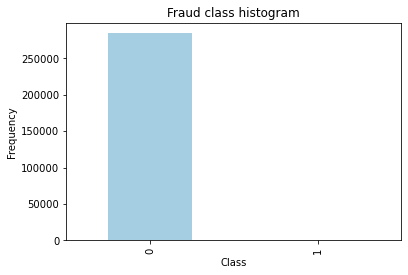

In [33]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color=plt.cm.Paired(np.arange(len(X_res))))
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

print(count_classes)

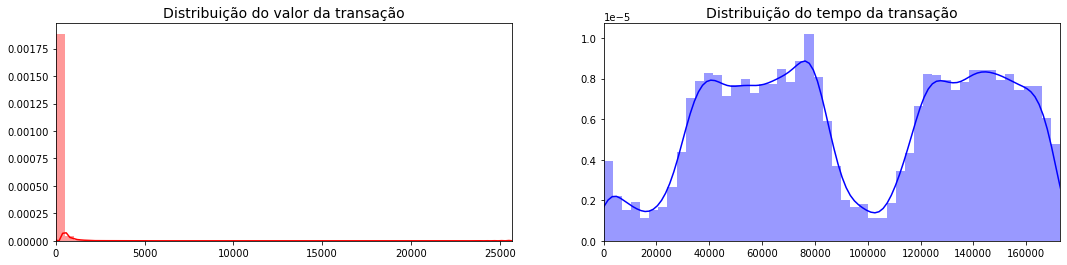

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribuição do valor da transação', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição do tempo da transação', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [18]:
scaler = StandardScaler()

df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [35]:
y = df['Class']
X = df.drop(labels=['Class'], axis=1)
print(X.shape, y.shape)

under_sample = SMOTE(random_state=42, sampling_strategy="auto")
X_res, y_res = under_sample.fit_resample(X, y)
X_res["Class"] = y_res 
print(X_res.shape, y_res.shape)

print(y_res)

(284807, 30) (284807,)
(568630, 31) (568630,)
0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


0    284315
1    284315
Name: Class, dtype: int64


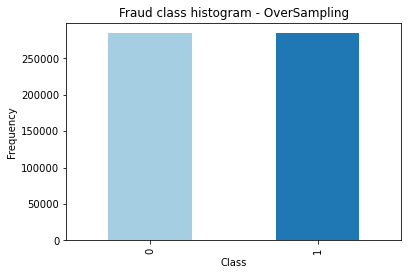

In [37]:
count_classes = pd.value_counts(X_res['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color=plt.cm.Paired(np.arange(len(X_res))))
plt.title("Fraud class histogram - OverSampling")
plt.xlabel("Class")
plt.ylabel("Frequency")

print(count_classes)

In [14]:
X_res

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260357,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,-0.350191,0
1,-0.932021,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,-0.336517,0
2,-0.835765,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,-0.293258,0
3,0.458181,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,-0.125338,0
4,-0.092231,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,-0.353229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1.565196,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024,0
980,1.569513,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191,0
981,1.569597,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,0
982,1.582548,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302,0


In [54]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef

In [55]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
sm = SMOTE(random_state=42)

svm = LinearSVC()
dt  = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
mlp  = MLPClassifier(random_state=42)
random_forest = RandomForestClassifier(max_depth=2, random_state=0)

In [70]:
models = [knn, dt, mlp, random_forest, svm]
models_acc = defaultdict(list)
models_f1 = defaultdict(list)
models_mcc = defaultdict(list)


for train_index, test_index in rkf.split(X_res, y_res):
    
                 
        X_train, X_test = X_res.iloc[train_index],X_res.iloc[test_index]
        y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
        
        print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
        #for model in models:
        #    
        #    model.fit(X_train_res, y_train_res)

        #    preds_test = model.predict(X_test)
            
        #    acc_test = accuracy_score(y_test, preds_test) 
        #    f1_test  = f1_score(y_test, preds_test, average='macro')
        #    mcc_test = matthews_corrcoef(y_test, preds_test)

        #    models_acc[model.__class__.__name__].append(acc_test)
        #    models_f1[model.__class__.__name__].append(f1_test)
        #    models_mcc[model.__class__.__name__].append(mcc_test)

(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196, 30) (788,) (196,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196, 30) (788,) (196,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196, 30) (788,) (196,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196, 30) (788,) (196,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196, 30) (788,) (196,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(787, 30) (197, 30) (787,) (197,)
(788, 30) (196

In [63]:
models

[KNeighborsClassifier(n_neighbors=1),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42),
 MLPClassifier(random_state=42),
 RandomForestClassifier(max_depth=2, random_state=0),
 LinearSVC()]

In [ ]:
print(models_acc)
print(models_f1)
print(models_mcc)